In [2]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import winsound
np.set_printoptions(precision=6,suppress=True)
%matplotlib inline

Using TensorFlow backend.


# Leonard Kramer fault diagnosis problem

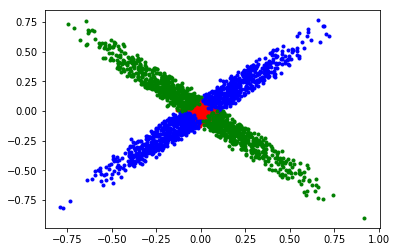

In [ ]:
#Generating the patterns
n = 3000 # of Patterns (multiple of 3)
patterns = np.zeros([n,5])
count = 0
i=[0,int(n/3),int(2*n/3),int(n)]
sd1=.25
sd2=.015
tr=.05
np.random.seed(123)

def cond(p1,p2,flag): 
    if flag==1: # Normal operating conditions
        return(abs(p1)<tr and abs(p2)<tr)
    elif flag==2: #Type 1 error
        return(abs(p1)>tr and abs(p2)<tr)
    elif flag==3: #Type 2 error
        return(abs(p1)<tr and abs(p2)>tr)


for pos,idx in enumerate(i):
    while count < idx:
        p1 = np.random.normal(0,sd1)
        p2 = np.random.normal(0,sd1)
        v1 = np.random.normal(0,sd2)
        v2 = np.random.normal(0,sd2)
        if cond(p1,p2,pos):
            patterns[count,0] = p1+p2+v1
            patterns[count,1] = p1-p2+v2
            patterns[count,pos+1] = 1
            count += 1
x_train = patterns[:,0:2]
y_train = patterns[:,2:]
np.random.seed(321)
shuff = np.arange(n)
np.random.shuffle(shuff)
x_shuffle = x_train[shuff]
y_shuffle = y_train[shuff]
plt.plot(x_train[i[0]:i[1],0],x_train[i[0]:i[1],1],'r.',
         x_train[i[1]:i[2],0],x_train[i[1]:i[2],1],'b.',
         x_train[i[2]:i[3],0],x_train[i[2]:i[3],1],'g.',)
plt.show()

In [29]:
%%time
np.random.seed(321)
model = Sequential()
model.add(Dense(units=20, activation='tanh', input_dim=2,name="l1"))
model.add(Dense(units=10, activation='tanh',name="l2"))
model.add(Dense(units=3, activation='tanh',name="l3"))
model.add(Dense(units=2, activation='tanh',name="l4"))
model.add(Dense(units=3, activation='softmax'))
from keras import optimizers
#sgd = optimizers.SGD(lr=0.1,decay=2.e-3)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
callbacks = ModelCheckpoint('bestfit.hdf5',save_best_only=True)
history = model.fit(x_shuffle, y_shuffle, epochs=1000, batch_size=1,verbose=1,callbacks=[callbacks],validation_split=0.9)
loss_and_metrics = model.evaluate(x_train, y_train)
print(loss_and_metrics)
winsound.Beep(2500,200)

Train on 299 samples, validate on 2701 samples
Epoch 1/1000
299/299 [==============================] - 2s - loss: 1.1148 - acc: 0.3344 - val_loss: 1.0990 - val_acc: 0.2521
Epoch 2/1000
299/299 [==============================] - 2s - loss: 1.1127 - acc: 0.3077 - val_loss: 1.1089 - val_acc: 0.3776
Epoch 3/1000
299/299 [==============================] - 2s - loss: 1.1116 - acc: 0.3043 - val_loss: 1.0987 - val_acc: 0.2636
Epoch 4/1000
299/299 [==============================] - 2s - loss: 1.1065 - acc: 0.3077 - val_loss: 1.1024 - val_acc: 0.2780
Epoch 5/1000
299/299 [==============================] - 2s - loss: 1.0946 - acc: 0.3445 - val_loss: 1.1290 - val_acc: 0.2903
Epoch 6/1000
299/299 [==============================] - 2s - loss: 1.1063 - acc: 0.3177 - val_loss: 1.0983 - val_acc: 0.3306
Epoch 7/1000
299/299 [==============================] - 2s - loss: 1.1037 - acc: 0.3411 - val_loss: 1.0963 - val_acc: 0.4724
Epoch 8/1000
299/299 [==============================] - 2s - loss: 1.1033 - ac

299/299 [==============================] - 2s - loss: 0.3413 - acc: 0.8094 - val_loss: 0.3978 - val_acc: 0.7749
Epoch 130/1000
299/299 [==============================] - 2s - loss: 0.3460 - acc: 0.8060 - val_loss: 0.3953 - val_acc: 0.7708
Epoch 131/1000
299/299 [==============================] - 2s - loss: 0.3576 - acc: 0.7960 - val_loss: 0.3912 - val_acc: 0.7930
Epoch 132/1000
299/299 [==============================] - 2s - loss: 0.3548 - acc: 0.8027 - val_loss: 0.3782 - val_acc: 0.7886
Epoch 133/1000
299/299 [==============================] - 2s - loss: 0.3421 - acc: 0.8027 - val_loss: 0.4885 - val_acc: 0.7371
Epoch 134/1000
299/299 [==============================] - 2s - loss: 0.3411 - acc: 0.8094 - val_loss: 0.3907 - val_acc: 0.7867
Epoch 135/1000
299/299 [==============================] - 2s - loss: 0.3553 - acc: 0.8361 - val_loss: 0.4258 - val_acc: 0.7612
Epoch 136/1000
299/299 [==============================] - 2s - loss: 0.3302 - acc: 0.7993 - val_loss: 0.3709 - val_acc: 0.7912

299/299 [==============================] - 2s - loss: 0.1879 - acc: 0.9431 - val_loss: 0.1785 - val_acc: 0.9404
Epoch 258/1000
299/299 [==============================] - 2s - loss: 0.1618 - acc: 0.9465 - val_loss: 0.2051 - val_acc: 0.9274
Epoch 259/1000
299/299 [==============================] - 2s - loss: 0.1549 - acc: 0.9431 - val_loss: 0.1621 - val_acc: 0.9493
Epoch 260/1000
299/299 [==============================] - 2s - loss: 0.1539 - acc: 0.9498 - val_loss: 0.2430 - val_acc: 0.9089
Epoch 261/1000
299/299 [==============================] - 2s - loss: 0.1543 - acc: 0.9532 - val_loss: 0.2568 - val_acc: 0.9137
Epoch 262/1000
299/299 [==============================] - 2s - loss: 0.1388 - acc: 0.9465 - val_loss: 0.1986 - val_acc: 0.9363
Epoch 263/1000
299/299 [==============================] - 2s - loss: 0.1373 - acc: 0.9565 - val_loss: 0.2168 - val_acc: 0.9278
Epoch 264/1000
299/299 [==============================] - 2s - loss: 0.1866 - acc: 0.9298 - val_loss: 0.2546 - val_acc: 0.9123

299/299 [==============================] - 2s - loss: 0.2046 - acc: 0.9431 - val_loss: 0.2404 - val_acc: 0.9248
Epoch 386/1000
299/299 [==============================] - 2s - loss: 0.1344 - acc: 0.9632 - val_loss: 0.1692 - val_acc: 0.9437
Epoch 387/1000
299/299 [==============================] - 2s - loss: 0.1196 - acc: 0.9565 - val_loss: 0.2399 - val_acc: 0.9215
Epoch 388/1000
299/299 [==============================] - 2s - loss: 0.1699 - acc: 0.9431 - val_loss: 0.2014 - val_acc: 0.9397
Epoch 389/1000
299/299 [==============================] - 2s - loss: 0.1752 - acc: 0.9532 - val_loss: 0.2083 - val_acc: 0.9382
Epoch 390/1000
299/299 [==============================] - 2s - loss: 0.1343 - acc: 0.9498 - val_loss: 0.3397 - val_acc: 0.8915
Epoch 391/1000
299/299 [==============================] - 2s - loss: 0.1697 - acc: 0.9398 - val_loss: 0.2331 - val_acc: 0.9304
Epoch 392/1000
299/299 [==============================] - 2s - loss: 0.1838 - acc: 0.9431 - val_loss: 0.8731 - val_acc: 0.7930

299/299 [==============================] - 2s - loss: 0.1090 - acc: 0.9666 - val_loss: 0.2486 - val_acc: 0.9293
Epoch 514/1000
299/299 [==============================] - 2s - loss: 0.1585 - acc: 0.9565 - val_loss: 0.1969 - val_acc: 0.9430
Epoch 515/1000
299/299 [==============================] - 2s - loss: 0.0957 - acc: 0.9699 - val_loss: 0.2151 - val_acc: 0.9341
Epoch 516/1000
299/299 [==============================] - 2s - loss: 0.1244 - acc: 0.9498 - val_loss: 0.2084 - val_acc: 0.9385
Epoch 517/1000
299/299 [==============================] - 2s - loss: 0.1284 - acc: 0.9599 - val_loss: 0.1929 - val_acc: 0.9352
Epoch 518/1000
299/299 [==============================] - 2s - loss: 0.1238 - acc: 0.9565 - val_loss: 0.2118 - val_acc: 0.9419
Epoch 519/1000
299/299 [==============================] - 2s - loss: 0.1125 - acc: 0.9666 - val_loss: 0.2401 - val_acc: 0.9234
Epoch 520/1000
299/299 [==============================] - 2s - loss: 0.1990 - acc: 0.9465 - val_loss: 0.1757 - val_acc: 0.9459

299/299 [==============================] - 2s - loss: 0.0931 - acc: 0.9666 - val_loss: 0.2489 - val_acc: 0.9234
Epoch 642/1000
299/299 [==============================] - 2s - loss: 0.1078 - acc: 0.9599 - val_loss: 0.2047 - val_acc: 0.9326
Epoch 643/1000
299/299 [==============================] - 2s - loss: 0.1034 - acc: 0.9666 - val_loss: 0.2314 - val_acc: 0.9311
Epoch 644/1000
299/299 [==============================] - 2s - loss: 0.0744 - acc: 0.9833 - val_loss: 0.2680 - val_acc: 0.9322
Epoch 645/1000
299/299 [==============================] - 2s - loss: 0.1404 - acc: 0.9498 - val_loss: 0.2024 - val_acc: 0.9404
Epoch 646/1000
299/299 [==============================] - 2s - loss: 0.1245 - acc: 0.9632 - val_loss: 0.1927 - val_acc: 0.9408
Epoch 647/1000
299/299 [==============================] - 2s - loss: 0.0861 - acc: 0.9766 - val_loss: 0.2098 - val_acc: 0.9422
Epoch 648/1000
299/299 [==============================] - 2s - loss: 0.1087 - acc: 0.9699 - val_loss: 0.2320 - val_acc: 0.9389

299/299 [==============================] - 2s - loss: 0.0960 - acc: 0.9666 - val_loss: 0.2126 - val_acc: 0.9426
Epoch 770/1000
299/299 [==============================] - 2s - loss: 0.0815 - acc: 0.9666 - val_loss: 0.2793 - val_acc: 0.9182
Epoch 771/1000
299/299 [==============================] - 2s - loss: 0.1050 - acc: 0.9632 - val_loss: 0.2158 - val_acc: 0.9437
Epoch 772/1000
299/299 [==============================] - 2s - loss: 0.0846 - acc: 0.9699 - val_loss: 0.2763 - val_acc: 0.9330
Epoch 773/1000
299/299 [==============================] - 2s - loss: 0.0826 - acc: 0.9766 - val_loss: 0.2295 - val_acc: 0.9415
Epoch 774/1000
299/299 [==============================] - 2s - loss: 0.1060 - acc: 0.9666 - val_loss: 0.2129 - val_acc: 0.9363
Epoch 775/1000
299/299 [==============================] - 2s - loss: 0.0960 - acc: 0.9666 - val_loss: 0.2800 - val_acc: 0.9285
Epoch 776/1000
299/299 [==============================] - 2s - loss: 0.0956 - acc: 0.9632 - val_loss: 0.2613 - val_acc: 0.9337

299/299 [==============================] - 2s - loss: 0.0817 - acc: 0.9766 - val_loss: 0.2396 - val_acc: 0.9404
Epoch 898/1000
299/299 [==============================] - 2s - loss: 0.0800 - acc: 0.9766 - val_loss: 0.2503 - val_acc: 0.9408
Epoch 899/1000
299/299 [==============================] - 2s - loss: 0.1080 - acc: 0.9666 - val_loss: 0.2549 - val_acc: 0.9293
Epoch 900/1000
299/299 [==============================] - 2s - loss: 0.1035 - acc: 0.9699 - val_loss: 0.2446 - val_acc: 0.9326
Epoch 901/1000
299/299 [==============================] - 2s - loss: 0.1057 - acc: 0.9565 - val_loss: 0.2606 - val_acc: 0.9315
Epoch 902/1000
299/299 [==============================] - 2s - loss: 0.0816 - acc: 0.9732 - val_loss: 0.3502 - val_acc: 0.9230
Epoch 903/1000
299/299 [==============================] - 2s - loss: 0.0863 - acc: 0.9699 - val_loss: 0.2434 - val_acc: 0.9378
Epoch 904/1000
299/299 [==============================] - 2s - loss: 0.0650 - acc: 0.9866 - val_loss: 0.2589 - val_acc: 0.9334

In [1]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['acc'])
ax2.plot(history.history['val_acc'])
plt.show()

NameError: name 'plt' is not defined

In [31]:
modeltemp = load_model('bestfit.hdf5')
modeltemp.evaluate(x_train,y_train)

2080/3000 [===================>..........] - ETA: 0s 

[0.15247310591737429, 0.95199999999999996]

In [32]:
swap = model
model = modeltemp
modeltemp = swap
inter1 = Model(inputs=model.input, outputs=model.get_layer('l1').output)
inter2 = Model(inputs=model.input, outputs=model.get_layer('l2').output)
inter3 = Model(inputs=model.input, outputs=model.get_layer('l3').output)
inter4 = Model(inputs=model.input, outputs=model.get_layer('l4').output)
interout1 = inter1.predict(x_train)
interout2 = inter2.predict(x_train)
interout3 = inter3.predict(x_train)
interout4 = inter4.predict(x_train)

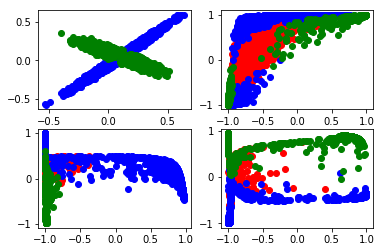

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(interout1[i[0]:i[1],1],interout1[i[0]:i[1],0],'ro',
         interout1[i[1]:i[2],1],interout1[i[1]:i[2],0],'bo',
         interout1[i[2]:i[3],1],interout1[i[2]:i[3],0],'go')
ax2.plot(interout2[i[0]:i[1],1],interout2[i[0]:i[1],0],'ro',
         interout2[i[1]:i[2],1],interout2[i[1]:i[2],0],'bo',
         interout2[i[2]:i[3],1],interout2[i[2]:i[3],0],'go')
ax3.plot(interout3[i[0]:i[1],1],interout3[i[0]:i[1],0],'ro',
         interout3[i[1]:i[2],1],interout3[i[1]:i[2],0],'bo',
         interout3[i[2]:i[3],1],interout3[i[2]:i[3],0],'go')
ax4.plot(interout4[i[0]:i[1],1],interout4[i[0]:i[1],0],'ro',
         interout4[i[1]:i[2],1],interout4[i[1]:i[2],0],'bo',
         interout4[i[2]:i[3],1],interout4[i[2]:i[3],0],'go')
plt.show()

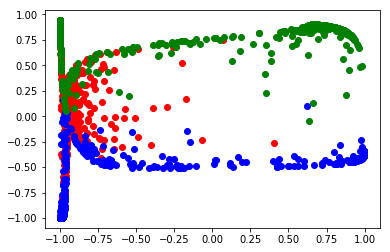

In [34]:
plt.plot(interout4[i[0]:i[1],1],interout4[i[0]:i[1],0],'ro',
         interout4[i[1]:i[2],1],interout4[i[1]:i[2],0],'bo',
         interout4[i[2]:i[3],1],interout4[i[2]:i[3],0],'go')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_train)
confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred,axis=1))

array([[858,  26, 116],
       [ 20, 946,  34],
       [113,  10, 877]], dtype=int64)